In [ ]:
!pip install pybaseball


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.1/426.1 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.7/432.7 kB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 59.0 MB/s eta 0:00:00


In [ ]:
from pybaseball import statcast_pitcher
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
cease = statcast_pitcher(
    "2024-03-01",
    "2024-10-01",
    656302
)

cease.head()


Gathering Player Data


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
0,SL,2024-09-25,88.8,-1.36,5.85,"Cease, Dylan",571970,656302,field_out,hit_into_play,...,1.0,2.75,-0.26,0.26,48.4,2.227332,22.807933,40.685022,38.994495,23.048175
1,SL,2024-09-25,88.8,-1.40,5.90,"Cease, Dylan",571970,656302,NaN,swinging_strike,...,1.0,2.73,-0.12,0.12,47.1,31.846227,-40.467339,34.260550,45.447841,59.863266
2,SL,2024-09-25,88.9,-1.17,5.90,"Cease, Dylan",571970,656302,NaN,swinging_strike,...,1.0,2.67,-0.16,0.16,48.1,35.100197,-33.792807,36.964982,42.439708,56.888295
3,SL,2024-09-25,88.7,-1.36,5.89,"Cease, Dylan",571970,656302,NaN,ball,...,1.0,2.86,-0.27,0.27,46.8,NaN,NaN,NaN,NaN,NaN
4,SL,2024-09-25,89.4,-0.97,5.97,"Cease, Dylan",606192,656302,field_out,hit_into_play,...,1.0,2.46,-0.09,-0.09,51.3,17.084731,-17.559136,29.292576,41.027603,37.089845


In [ ]:
cease = cease[['pitch_type', 'description']].dropna()
cease.head()


,pitch_type,description
0,SL,hit_into_play
1,SL,swinging_strike
2,SL,swinging_strike
3,SL,ball
4,SL,hit_into_play


In [ ]:
cease['is_whiff'] = cease['description'].isin([
    'swinging_strike',
    'swinging_strike_blocked'
])

cease['is_swing'] = cease['description'].isin([
    'swinging_strike',
    'swinging_strike_blocked',
    'foul',
    'hit_into_play'
])


In [ ]:
whiff_by_pitch = (
    cease.groupby('pitch_type')
    .agg(
        swings=('is_swing', 'sum'),
        whiffs=('is_whiff', 'sum')
    )
)

whiff_by_pitch['whiff_pct'] = (
    whiff_by_pitch['whiffs'] / whiff_by_pitch['swings']
) * 100

whiff_by_pitch.sort_values('whiff_pct', ascending=False)


,swings,whiffs,whiff_pct
pitch_type,,,
SL,701,306,43.651926
ST,39,13,33.333333
KC,92,25,27.173913
CH,5,1,20.000000
FF,695,132,18.992806
FC,4,0,0.000000
SI,1,0,0.000000


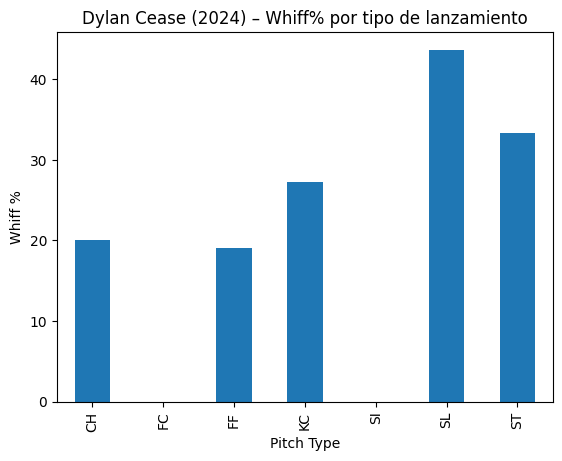

In [ ]:
whiff_by_pitch['whiff_pct'].plot(kind='bar')
plt.ylabel('Whiff %')
plt.xlabel('Pitch Type')
plt.title('Dylan Cease (2024) – Whiff% por tipo de lanzamiento')
plt.show()


In [ ]:
pitch_usage = (
    cease.groupby('pitch_type')
    .size()
    .reset_index(name='pitches')
)

pitch_usage['usage_pct'] = (
    pitch_usage['pitches'] / pitch_usage['pitches'].sum()
) * 100

pitch_usage


,pitch_type,pitches,usage_pct
0,CH,28,0.858106
1,FC,19,0.582286
2,FF,1417,43.426295
3,KC,265,8.121361
4,SI,2,0.061293
5,SL,1394,42.721422
6,ST,138,4.229237


In [ ]:
summary = pitch_usage.merge(
    whiff_by_pitch.reset_index(),
    on='pitch_type'
)

summary[['pitch_type', 'usage_pct', 'whiff_pct']].sort_values(
    'usage_pct', ascending=False
)


,pitch_type,usage_pct,whiff_pct
2,FF,43.426295,18.992806
5,SL,42.721422,43.651926
3,KC,8.121361,27.173913
6,ST,4.229237,33.333333
0,CH,0.858106,20.000000
1,FC,0.582286,0.000000
4,SI,0.061293,0.000000


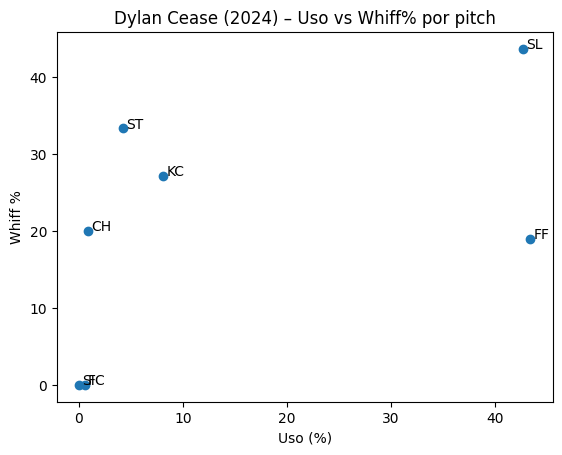

In [ ]:
plt.scatter(summary['usage_pct'], summary['whiff_pct'])

for i, row in summary.iterrows():
    plt.text(
        row['usage_pct'] + 0.3,
        row['whiff_pct'],
        row['pitch_type']
    )

plt.xlabel('Uso (%)')
plt.ylabel('Whiff %')
plt.title('Dylan Cease (2024) – Uso vs Whiff% por pitch')
plt.show()


In [ ]:
import os

os.makedirs("figures", exist_ok=True)


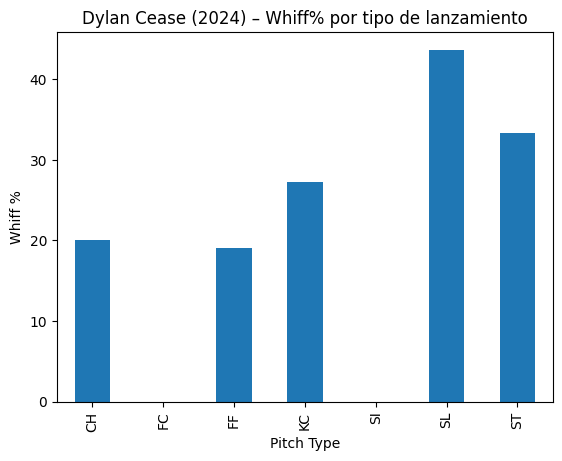

In [ ]:
whiff_by_pitch['whiff_pct'].plot(kind='bar')
plt.ylabel('Whiff %')
plt.xlabel('Pitch Type')
plt.title('Dylan Cease (2024) – Whiff% por tipo de lanzamiento')

plt.savefig("figures/usage_vs_whiff_2024.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
import os
os.listdir()


['.config', 'figures', 'sample_data']

In [1]:
from google.colab import files
files.download('.config')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>